In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,NaN,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,NaN
1,13.20,1.78,NaN,NaN,100.0,2.65,2.76,0.26,1.28,NaN,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,NaN,2.81,5.68,1.03,3.17,1185.0
3,NaN,1.95,2.50,16.8,NaN,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,NaN,118.0,2.80,2.69,NaN,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,5.65,2.45,NaN,95.0,1.68,0.61,NaN,1.06,NaN,0.64,1.74,740.0
174,13.40,3.91,NaN,NaN,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,NaN,4.28,NaN,20.0,120.0,1.59,0.69,0.43,1.35,NaN,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,NaN,1.65,0.68,NaN,1.46,NaN,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	46
float64		column 2	30
float64		column 3	30
float64		column 4	76
float64		column 5	61
float64		column 6	15
float64		column 7	15
float64		column 8	61
float64		column 9	30
float64		column 10	31
float64		column 11	0
float64		column 12	31
float64		column 13	30


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,132.000000,148.000000,148.000000,102.000000,117.000000,163.000000,163.000000,117.000000,148.000000,147.000000,178.000000,147.000000,148.000000
mean,12.948561,2.313243,2.370338,19.317647,99.333333,2.317423,2.040920,0.359231,1.595743,5.028639,0.957449,2.642857,740.006757
std,0.734095,1.076561,0.254255,2.662367,11.281660,0.623158,0.989467,0.113054,0.525993,2.215524,0.228572,0.677446,311.884714
min,11.030000,0.890000,1.700000,12.000000,78.000000,0.980000,0.340000,0.170000,0.410000,1.740000,0.480000,1.270000,278.000000
25%,12.370000,1.625000,2.230000,18.000000,89.000000,1.795000,1.250000,0.280000,1.295000,3.325000,0.782500,2.085000,501.500000
50%,12.945000,1.875000,2.360000,19.250000,99.000000,2.400000,2.130000,0.340000,1.560000,4.700000,0.965000,2.780000,673.500000
75%,13.490000,2.907500,2.560000,20.950000,106.000000,2.815000,2.870000,0.430000,1.927500,5.865000,1.120000,3.165000,945.250000
max,14.390000,5.800000,3.220000,27.000000,136.000000,3.880000,5.080000,0.660000,3.280000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

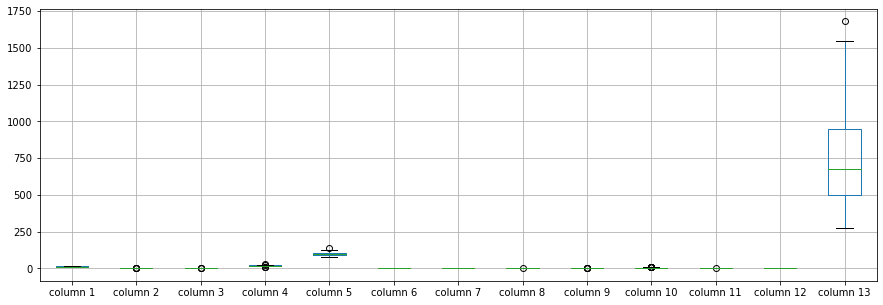

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.948561
column 2       2.313243
column 3       2.370338
column 4      19.317647
column 5      99.333333
column 6       2.317423
column 7       2.040920
column 8       0.359231
column 9       1.595743
column 10      5.028639
column 11      0.957449
column 12      2.642857
column 13    740.006757
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.065083,0.291799,-0.202728,0.460769,0.250605,0.163633,-0.237666,0.190182,0.482473,-0.128284,0.072579,0.603744
column 2,0.065083,1.000000,0.161151,0.320893,-0.088534,-0.341780,-0.413580,0.225960,-0.235183,0.206981,-0.535200,-0.419160,-0.234295
column 3,0.291799,0.161151,1.000000,0.243355,0.276095,0.097079,0.082002,0.147996,0.046516,0.232163,-0.064913,0.013932,0.273398
column 4,-0.202728,0.320893,0.243355,1.000000,-0.006133,-0.509956,-0.576935,0.367779,-0.366297,0.131663,-0.496595,-0.476092,-0.457825
column 5,0.460769,-0.088534,0.276095,-0.006133,1.000000,0.172515,0.147768,-0.207804,0.020985,0.325194,-0.038366,0.062288,0.403411
column 6,0.250605,-0.341780,0.097079,-0.509956,0.172515,1.000000,0.863645,-0.508775,0.591570,0.050589,0.438905,0.708257,0.484032
column 7,0.163633,-0.413580,0.082002,-0.576935,0.147768,0.863645,1.000000,-0.551638,0.678064,-0.064889,0.532569,0.791149,0.459125
column 8,-0.237666,0.225960,0.147996,0.367779,-0.207804,-0.508775,-0.551638,1.000000,-0.385190,0.014962,-0.299421,-0.485976,-0.358721
column 9,0.190182,-0.235183,0.046516,-0.366297,0.020985,0.591570,0.678064,-0.385190,1.000000,0.157129,0.337184,0.459455,0.333599
column 10,0.482473,0.206981,0.232163,0.131663,0.325194,0.050589,-0.064889,0.014962,0.157129,1.000000,-0.492149,-0.340092,0.326946


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+109,13+109+109,13+109+109,13+109+109+109+109,13+109+109+109+109+109,13+109+109+109+109+109+109,13+109+109+109+109+109,13+109+109+109+109,13+109+109+109,13+109+109,13+109,13], vae_layer = False, seed = 1090)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 764.9843583540483
Epoch: 1 , loss: 770.8157737038352
Epoch: 2 , loss: 767.2620794122869
Epoch: 3 , loss: 768.9715492942116
Epoch: 4 , loss: 767.7295754172585
Epoch: 5 , loss: 766.8432173295455
Epoch: 6 , loss: 762.6416625976562
Epoch: 7 , loss: 774.1698164506392
Epoch: 8 , loss: 771.3314042524858
Epoch: 9 , loss: 768.4463223544034
Epoch: 10 , loss: 766.2560147372159
Epoch: 11 , loss: 762.105146928267
Epoch: 12 , loss: 771.623085715554
Epoch: 13 , loss: 770.1693781072444
Epoch: 14 , loss: 760.6112670898438
Epoch: 15 , loss: 765.1161499023438
Epoch: 16 , loss: 752.4371892755681
Epoch: 17 , loss: 762.3302945223721
Epoch: 18 , loss: 757.6266812411221
Epoch: 19 , loss: 753.1938698508523
Epoch: 20 , loss: 754.7106434215199
Epoch: 21 , loss: 755.4713467684659
Epoch: 22 , loss: 757.6008356267756
Epoch: 23 , loss: 748.9257202148438
Epoch: 24 , loss: 747.6320467862216
Epoch: 25 , loss: 751.4525340687145
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,-14.707116,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,-1040.91584
1,0.000000,0.0,1.485826,6.446646,0.000000,0.0,0.0,0.000000,0.0,1.970429,0.0,0.0,0.00000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,-0.127439,0.0,0.000000,0.0,0.0,0.00000
3,-12.237618,0.0,0.000000,0.000000,-95.210676,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
4,0.000000,0.0,0.000000,-14.347278,0.000000,0.0,0.0,-0.568429,0.0,0.000000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-8.991509,0.0,0.000000,-14.766387,0.000000,0.0,0.0,-0.725483,0.0,-5.556117,0.0,0.0,0.00000
174,0.000000,0.0,-0.967491,-16.719892,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
175,8.999506,0.0,3.008353,0.000000,0.000000,0.0,0.0,0.000000,0.0,-1.380473,0.0,0.0,0.00000
176,0.000000,0.0,0.000000,0.000000,-116.762061,0.0,0.0,-0.497871,0.0,-9.103437,0.0,0.0,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4232.404090433534, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.38836243218357364

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5       8.580802
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       0.425673
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,2.430000,0.892884,127.000000,2.80,3.06,0.280000,2.29,5.640000,1.04,3.92,24.08416
1,13.200000,1.78,3.625826,17.646646,100.000000,2.65,2.76,0.260000,1.28,6.350429,1.05,3.40,1050.00000
2,13.160000,2.36,2.670000,18.600000,101.000000,2.80,3.24,0.172561,2.81,5.680000,1.03,3.17,1185.00000
3,2.132382,1.95,2.500000,16.800000,17.789324,3.85,3.49,0.240000,2.18,7.800000,0.86,3.45,1480.00000
4,13.240000,2.59,2.870000,6.652722,118.000000,2.80,2.69,-0.178429,1.82,4.320000,1.04,2.93,735.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,4.718491,5.65,2.450000,5.733613,95.000000,1.68,0.61,-0.205483,1.06,2.143883,0.64,1.74,740.00000
174,13.400000,3.91,1.512509,6.280108,102.000000,1.80,0.75,0.430000,1.41,7.300000,0.70,1.56,750.00000
175,22.269506,4.28,5.268353,20.000000,120.000000,1.59,0.69,0.430000,1.35,8.819527,0.59,1.56,835.00000
176,13.170000,2.59,2.370000,20.000000,3.237939,1.65,0.68,0.032129,1.46,0.196563,0.60,1.62,840.00000


In [20]:
imputations[-1].to_excel("Wine_NW_20(imp).xlsx", index=False, header=False)